In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
location = "titanic.xls"
df = pd.read_excel(location)

In [3]:
print(df.columns.values)

['pclass' 'survived' 'name' 'sex' 'age' 'sibsp' 'parch' 'ticket' 'fare'
 'cabin' 'embarked' 'boat' 'body' 'home.dest']


In [4]:
#Which features are categorical?These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.
#Categorical: Survived, Sex, and Embarked. Ordinal: Pclass
#Which features are numerical?Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.
#Continous: Age, Fare. Discrete: SibSp, Parch
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
#Which features are mixed data types?
#Numerical, alphanumeric data within same feature. These are candidates for correcting goal.
#Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.
#Which features may contain errors or typos?
#This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.
#Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [6]:
#Which features contain blank, null or empty values?These will require correcting.
#Cabin > Age > Embarked features contain a number of null values in that order fordataset.
#Cabin > Age are incomplete in  dataset.
#What are the data types for various features?
#Seven features are integer or floats. Six in case of test dataset.
#Five features are strings (object).
df.info()
print('_')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB
_


#What is the distribution of numerical feature values across the samples?
#helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.
#Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
#Survived is a categorical feature with 0 or 1 values.
#Around 38% samples survived representative of the actual survival rate at 32%.
#Most passengers (> 75%??) did not travel with parents or children.
#Nearly 30% of the passengers had siblings and/or spouse aboard.
#Fares varied significantly with few passengers (<1%) paying as high as $512.
#Few elderly passengers (<1%) within age range 65-80.

In [7]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
#What is the distribution of categorical features?
#Names are unique across the dataset (count=unique=1307)
#Sex variable as two possible values with 65%?? male (top=male(name is female), freq=843/count=1309).
#Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
#Embarked takes three possible values. S port used by most passengers (top=S)
#Ticket feature has high ratio (22%??) of duplicate values (unique=939).
df.describe(include=['O'])

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,939,186,3,28,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


Assumtions based on data analysis
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

Correlating.

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

Completing.

We may want to complete Age feature as it is definitely correlated to survival.
We may want to complete the Embarked feature as it may also correlate with survival or another important feature.
Correcting.

Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
PassengerId may be dropped from training dataset as it does not contribute to survival.
Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.
Creating.

We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
We may want to engineer the Name feature to extract Title as a new feature.
We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
We may also want to create a Fare range feature if it helps our analysis.
Classifying.

We may also add to our assumptions based on the problem description noted earlier.

Women (Sex=female) were more likely to have survived.
Children (Age<?) were more likely to have survived.
The upper-class passengers (Pclass=1) were more likely to have survived.

Analyze by pivoting features¶

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.


In [9]:
#Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
df[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived
0,1,0.619195
1,2,0.429603
2,3,0.255289


In [10]:
#Sex We confirm the observation during problem definition that
#Sex=female had very high survival rate at 73% (classifying #1)
df[["sex", "survived"]].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.727468
1,male,0.190985


In [11]:
#SibSp and Parch These features have zero correlation for certain values. 
df[["sibsp", "survived"]].groupby(['sibsp'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sibsp,survived
1,1,0.510972
2,2,0.452381
0,0,0.346801
3,3,0.300000
4,4,0.136364
5,5,0.000000
6,8,0.000000


In [12]:
#It may be best to derive a feature or a set of features from these individual features (creating #1).
df[["parch", "survived"]].groupby(['parch'], as_index=False).mean().sort_values(by='survived', ascending=False)

,parch,survived
3,3,0.625000
1,1,0.588235
2,2,0.504425
0,0,0.335329
4,4,0.166667
5,5,0.166667
6,6,0.000000
7,9,0.000000


Analyze by visualizing data¶
Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

Correlating numerical features

Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

Observations.

Infants (Age <=4) had high survival rate.
Oldest passengers (Age = 80) survived.
Large number of 15-25 year olds did not survive.
Most passengers are in 15-35 age range.

Decisions.

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

We should consider Age (our assumption classifying #2) in our model training.
Complete the Age feature for null values (completing #1).
We should band age groups (creating #3).

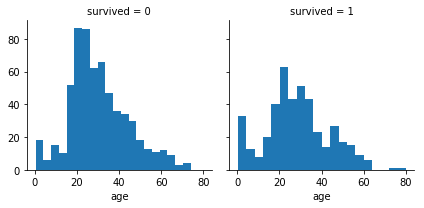

In [13]:
g = sns.FacetGrid(df, col='survived')
g.map(plt.hist, 'age', bins=20)

Correlating numerical and ordinal features
We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

Observations.

Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
Pclass varies in terms of Age distribution of passengers.
Decisions.

Consider Pclass for model training.

C:\Users\claud\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


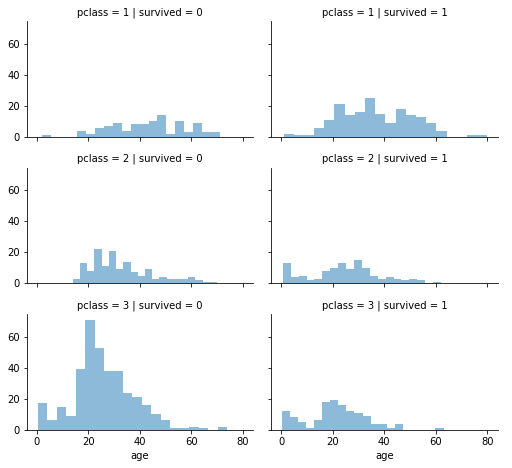

In [14]:
# grid = sns.FacetGrid(df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(df, col='survived', row='pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

Correlating categorical features
Now we can correlate categorical features with our solution goal.

Observations.

Female passengers had much better survival rate than males. Confirms classifying (#1).
Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.

Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).

Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

Decisions.

Add Sex feature to model training.
Complete and add Embarked feature to model training.


C:\Users\claud\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\claud\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\claud\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\claud\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis)

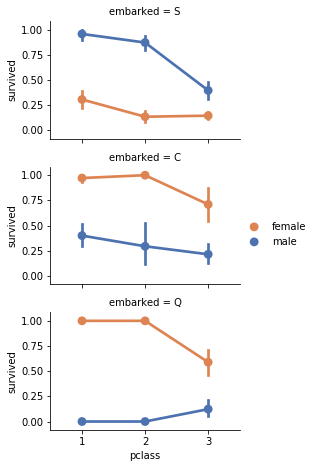

In [15]:
# grid = sns.FacetGrid(df, col='Embarked')
grid = sns.FacetGrid(df, row='embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette='deep')
grid.add_legend()

Correlating categorical and numerical features
We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

Observations.

Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).
Decisions.

Consider banding Fare feature.

C:\Users\claud\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\claud\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


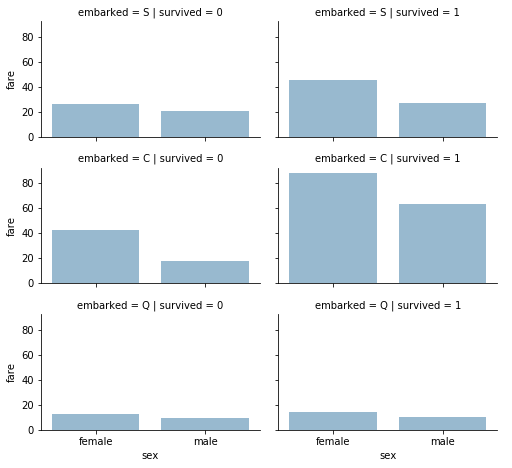

In [16]:
# grid = sns.FacetGrid(df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(df, row='embarked', col='survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'sex', 'fare', alpha=.5, ci=None)
grid.add_legend()

In [19]:
cols = ['name', 'ticket', 'cabin']
df = df.drop(cols, axis=1)

In [20]:
df.dtypes

pclass         int64
survived       int64
sex           object
age          float64
sibsp          int64
parch          int64
fare         float64
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [21]:
#number of non-NA values
df.count()

pclass       1309
survived     1309
sex          1309
age          1046
sibsp        1309
parch        1309
fare         1308
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [22]:
len(df)
#len(df) would count rows including NA values
 

1309

In [23]:
#total missing values
df.isnull().sum()

pclass          0
survived        0
sex             0
age           263
sibsp           0
parch           0
fare            1
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [34]:
#skLearn can't pass strings, so need to change the values (male and female) of Sex to integers numbers.#Males = 0, Females = 1
df['sex_factor'] = pd.factorize(df.sex)[0]
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest,sex_factor
0,1,1,female,29.0000,0,0,211.3375,S,2,NaN,"St Louis, MO",0
1,1,1,male,0.9167,1,2,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,0,female,2.0000,1,2,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,male,30.0000,1,2,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,female,25.0000,1,2,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [41]:
from sklearn.linear_model import LinearRegression


#assign linear regression function to a variable
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
#Need to predict if a passenger survived so make Survived target column
columns_target=['survived']
#Does Age, Pclass, Fare, Sex contribute to survival?
columns_train=['age', 'pclass', 'sex_factor'] 
#Below we seperate the target (Survived) from the other factors
x=df[columns_train]
y=df[columns_target]

In [43]:
#Next I need to prepare the data so there is no incompatable data. Chack for NaN values.
x['sex_factor'].isnull().sum()

0

In [44]:
x['pclass'].isnull().sum()

0

In [46]:
x['age'].isnull().sum()

263

In [47]:
#There are 263 NaN age values. We can't drop rows because there it's too many rows to drop. 
#I will replace all the NaN values with median (median = middle value in the list)
x['age']=x['age'].fillna(x['age'].median())
x['age'].isnull().sum()

C:\Users\claud\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0

In [48]:
x.head()

,age,pclass,sex_factor
0,29.0000,1,0
1,0.9167,1,1
2,2.0000,1,0
3,30.0000,1,1
4,25.0000,1,0


In [49]:
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: [1.24701951]


In [52]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 1


In [64]:
pd.DataFrame(list(zip(x.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,age,"[-0.0033028857661181956, -0.16759135579311987,..."


In [65]:
lm.predict(x)[0:5]

array([[0.89094461],
       [0.50495731],
       [0.98012253],
       [0.40889849],
       [0.90415615]])

In [56]:
#split the data to train a test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 42)

In [57]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(877, 3)
(432, 3)
(877, 1)
(432, 1)


In [58]:
lm = LinearRegression()
lm.fit(x_train, y_train)
pred_train = lm.predict(x_train)
pred_test = lm.predict(x_test)

In [59]:
print ('Fit a model x_train, and calculate MSE with y_train:', np.mean((y_train - lm.predict(x_train)) ** 2))
print ('Fit a model x_train, and calculate MSE with x_test, y_test:', np.mean((y_test - lm.predict(x_test)) ** 2))

Fit a model x_train, and calculate MSE with y_train: survived    0.153549
dtype: float64
Fit a model x_train, and calculate MSE with x_test, y_test: survived    0.151289
dtype: float64
